In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr
from numpy import mean
from numpy import absolute
from numpy import sqrt

import statsmodels.api as sm
import statsmodels.formula.api as smf



In [32]:
bike = pd.read_csv("Bike Sharing Dataset.csv", usecols=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 2.0+ MB


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,january,0,no,saturday,no,clear,0.24,0.2879,0.81,0.0,3,13,16
1,spring,0,january,1,no,saturday,no,clear,0.22,0.2727,0.80,0.0,8,32,40
2,spring,0,january,2,no,saturday,no,clear,0.22,0.2727,0.80,0.0,5,27,32
3,spring,0,january,3,no,saturday,no,clear,0.24,0.2879,0.75,0.0,3,10,13
4,spring,0,january,4,no,saturday,no,clear,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
bike.info()
print(bike.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 2.0+ MB
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp

In [34]:
# Start of Blaine's code for linear regression
bike['workingday'] = bike.workingday.factorize()[0]
bike['weathersit'] = bike.weathersit.factorize()[0]
bike['season'] = bike.season.factorize()[0]
bike['mnth'] = bike.mnth.factorize()[0]
bike['weekday'] = bike.weekday.factorize()[0]
bike['holiday'] = bike.holiday.factorize()[0]


est = smf.ols('cnt ~ hr + workingday + temp', bike).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2259.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:34:03   Log-Likelihood:            -1.1218e+05
No. Observations:               17379   AIC:                         2.244e+05
Df Residuals:                   17375   BIC:                         2.244e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -84.6416      3.906    -21.669      0.000     -92.298     -76.985
hr             9.0494      0.170     53.100      0.000       8.715       9.383
workingday     3.7938      2.512      1.511      0.131      -1.129       8.717
temp         336.0729      6.129     54.834      0.000     324.060     348.086
==============================================================================
Omnibus:                     3951.373   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8470.361
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

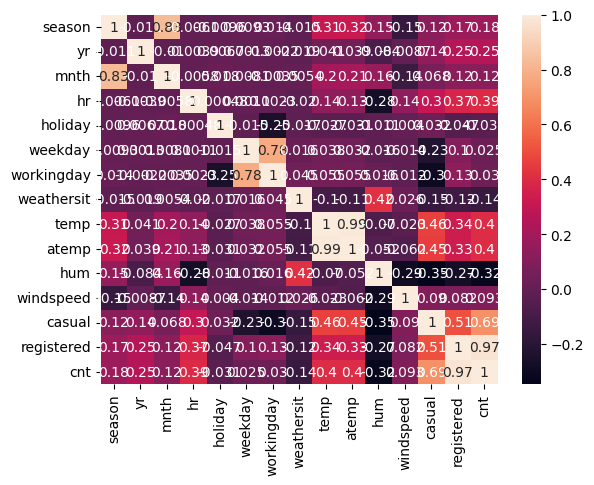

In [35]:
corr_matrix = bike.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


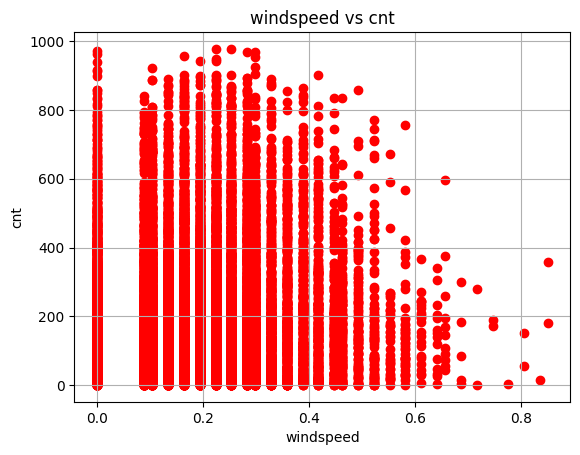

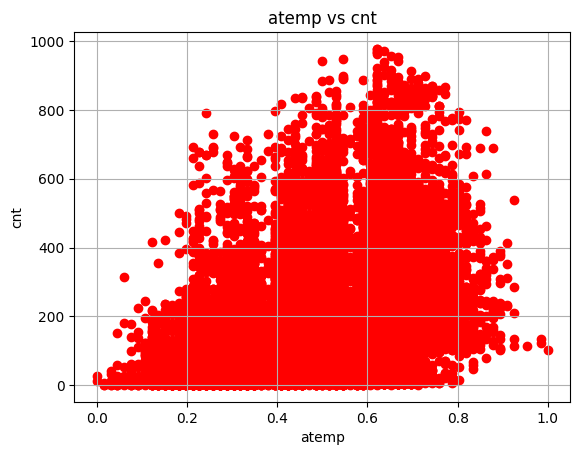

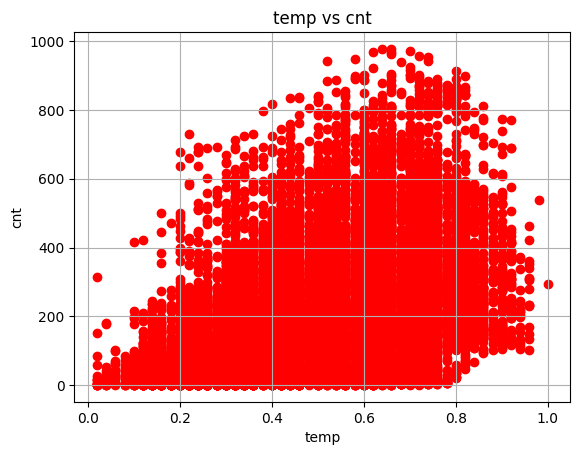

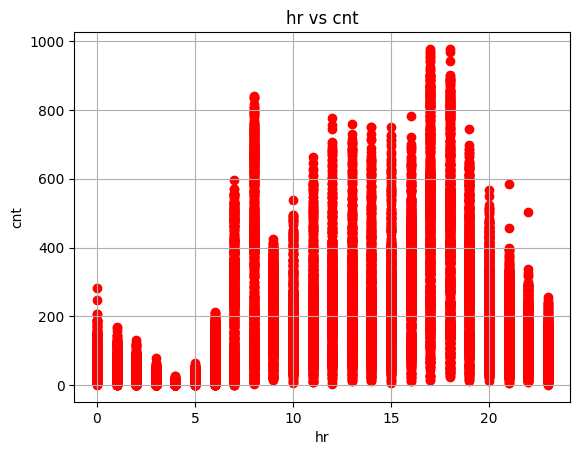

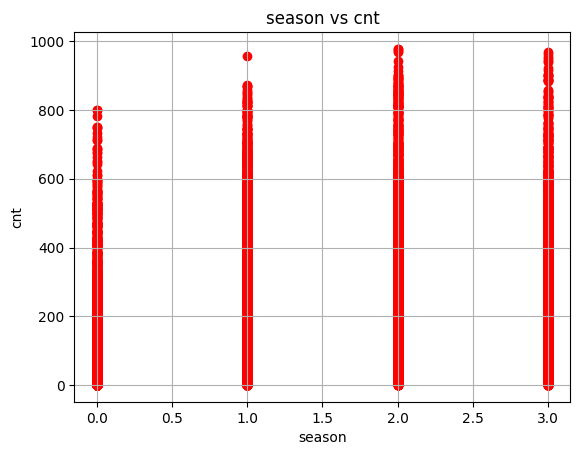

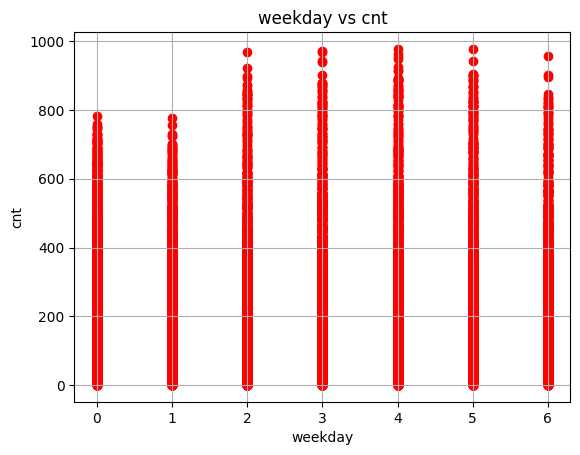

In [36]:
plt.scatter(bike['windspeed'], bike['cnt'], color='red')
plt.title('windspeed vs cnt')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['atemp'], bike['cnt'], color='red')
plt.title('atemp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['temp'], bike['cnt'], color='red')
plt.title('temp vs cnt')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['hr'], bike['cnt'], color='red')
plt.title('hr vs cnt')
plt.xlabel('hr')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['season'], bike['cnt'], color='red')
plt.title('season vs cnt')
plt.xlabel('season')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['weekday'], bike['cnt'], color='red')
plt.title('weekday vs cnt')
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

In [37]:
x = bike[['windspeed','hr','temp','season','weekday','workingday','weathersit']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.2981963792473053

In [38]:
x = bike[['windspeed','hr','temp','season','weekday','workingday','weathersit','casual']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.5837729019864785

In [39]:
# Preprocess Data (encode categorical values)

# import data

bike_df = pd.read_csv('Bike Sharing Dataset.csv', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14 , 15, 16])

print("======= Datatypes =======")
bike_df.dtypes



======= Datatypes =======


dteday         object
season         object
yr              int64
mnth           object
hr              int64
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [40]:
bike_df.head()

cat_df = bike_df.select_dtypes(include=['object']).copy()

cat_df.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit
0,1/01/2011,spring,january,no,saturday,no,clear
1,1/01/2011,spring,january,no,saturday,no,clear
2,1/01/2011,spring,january,no,saturday,no,clear
3,1/01/2011,spring,january,no,saturday,no,clear
4,1/01/2011,spring,january,no,saturday,no,clear


In [41]:
cat_df["weathersit"] = cat_df["weathersit"].astype('category')
cat_df["season"] = cat_df["season"].astype('category')
cat_df["mnth"] = cat_df["mnth"].astype('category')
cat_df['weekday'] = cat_df["weekday"].astype('category')

cat_df.dtypes

dteday          object
season        category
mnth          category
holiday         object
weekday       category
workingday      object
weathersit    category
dtype: object

In [42]:
cat_df["weathersit_cat"] = cat_df["weathersit"].cat.codes
cat_df["season_cat"] = cat_df["season"].cat.codes
cat_df["mnth_cat"] = cat_df["mnth"].cat.codes
cat_df['weekday_cat'] = cat_df["weekday"].cat.codes

cat_df.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,weathersit_cat,season_cat,mnth_cat,weekday_cat
0,1/01/2011,spring,january,no,saturday,no,clear,0,1,4,2
1,1/01/2011,spring,january,no,saturday,no,clear,0,1,4,2
2,1/01/2011,spring,january,no,saturday,no,clear,0,1,4,2
3,1/01/2011,spring,january,no,saturday,no,clear,0,1,4,2
4,1/01/2011,spring,january,no,saturday,no,clear,0,1,4,2


In [43]:
# when you run this script for the first time, make sure you run this line of code too.
# cat_df = pd.get_dummies(cat_df, columns=['holiday', 'workingday'])
cat_df['holiday_no'] = cat_df['holiday_no'].astype(int)
cat_df['holiday_yes'] = cat_df['holiday_yes'].astype(int)
cat_df['workingday_no'] = cat_df['workingday_no'].astype(int)
cat_df['workingday_yes'] = cat_df['workingday_no'].astype(int)

cat_df.head()


,dteday,season,mnth,weekday,weathersit,weathersit_cat,season_cat,mnth_cat,weekday_cat,holiday_no,holiday_yes,workingday_no,workingday_yes
0,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1
1,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1
2,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1
3,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1
4,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1


In [44]:
# merging encoded dataset with the original dataset
bike_df_final = bike_df.merge(cat_df)

bike_df_final.head()

bike_df_final.to_csv("BikeSharingDatasetFinal.csv")


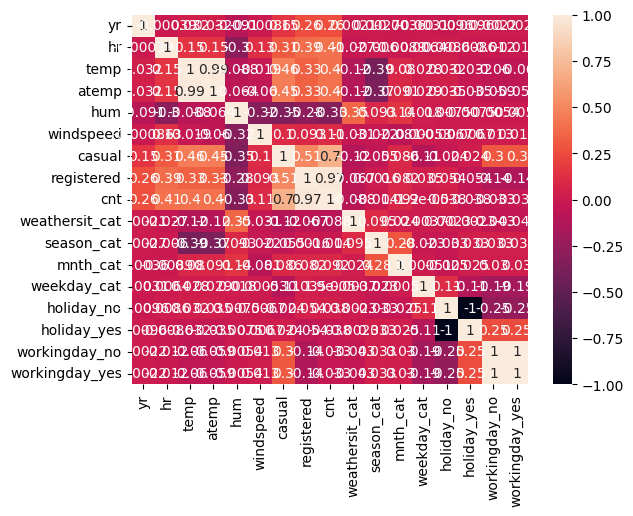

In [45]:
# Blaine's Code (with my version of encoding)
bike_df_final = pd.read_csv('BikeSharingDatasetFinal.csv', usecols=[3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
corr_matrix = bike_df_final.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


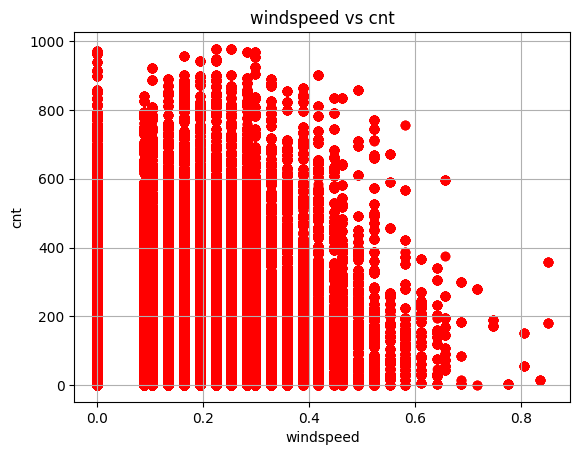

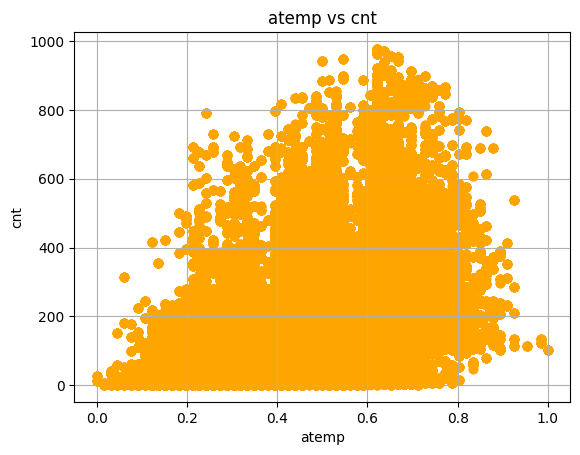

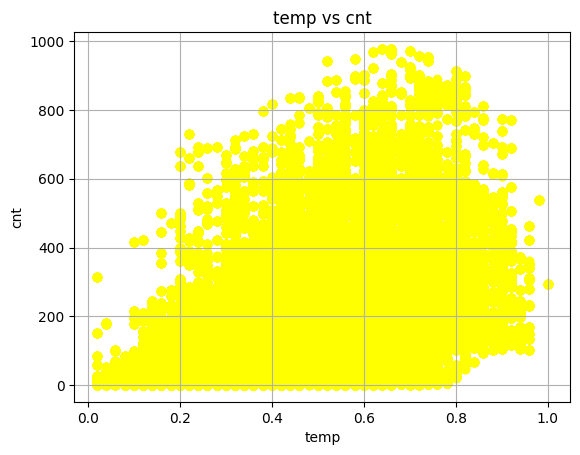

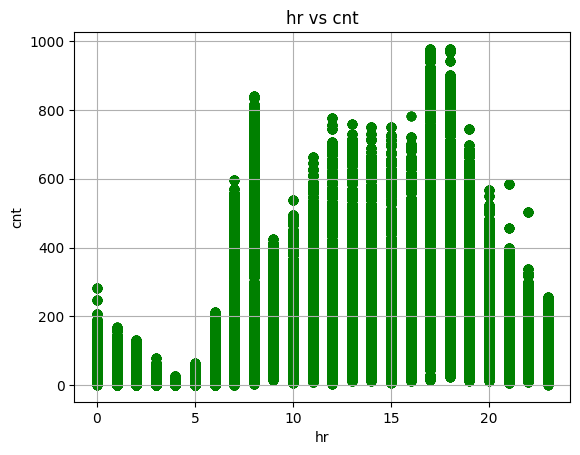

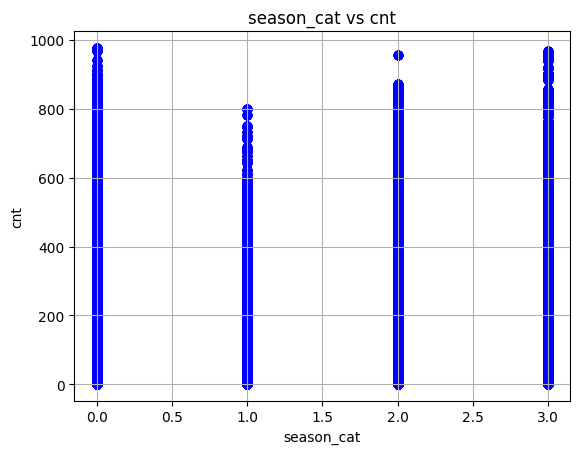

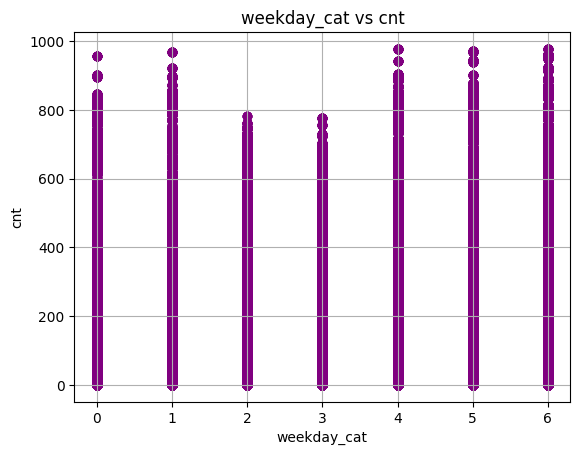

In [46]:
plt.scatter(bike_df_final['windspeed'], bike_df_final['cnt'], color='red')
plt.title('windspeed vs cnt')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['atemp'], bike_df_final['cnt'], color='orange')
plt.title('atemp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['temp'], bike_df_final['cnt'], color='yellow')
plt.title('temp vs cnt')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['hr'], bike_df_final['cnt'], color='green')
plt.title('hr vs cnt')
plt.xlabel('hr')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['season_cat'], bike_df_final['cnt'], color='blue')
plt.title('season_cat vs cnt')
plt.xlabel('season_cat')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['weekday_cat'], bike_df_final['cnt'], color='purple')
plt.title('weekday_cat vs cnt')
plt.xlabel('weekday_cat')
plt.ylabel('cnt')
plt.grid(True)
plt.show()


In [114]:
x = bike_df_final[['windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat']]
y = bike_df_final['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.31068582940337

In [115]:
model.fit(x,y)
print("Score:  ", model.score(x, y))


Score:   0.3109112476702839


In [116]:
x = bike_df_final[['windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat', 'casual']]
y = bike_df_final['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))



0.5868954076579161

In [117]:
model.fit(x,y)
print("Score:  ", model.score(x, y))


Score:   0.5869227256998718


In [123]:
# poly model - 1 
#  cnt as dependent
# hr , workingday_yes , temp as three independent variables(here workingday_yes is only considered since workingday_yes and workingday_no both cancel out each other.)
# use statsmodels & ISLP's poly() function

import ISLP
from ISLP.models import (ModelSpec,
                         summarize,
                         Column,
                         Feature,
                         build_columns, poly)


y_poly1 = bike_df_final['cnt']


x_poly1 = ModelSpec([poly('hr', degree=2),
                     poly('workingday_yes', degree=2),
                     poly('temp', degree=2),
                     'workingday_yes', 
                     'temp',
                     'hr'
                      ]).fit_transform(bike_df_final)

poly1model = sm.OLS(y_poly1, x_poly1)
results_poly1 = poly1model.fit()
summarize(results_poly1)

print(results_poly1.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 3.863e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:19:44   Log-Likelihood:            -1.8163e+06
No. Observations:              284701   AIC:                         3.633e+06
Df Residuals:                  284695   BIC:                         3.633e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
interc

In [119]:
from sklearn.preprocessing import PolynomialFeatures


In [120]:

# poly model - 2 
# cnt as dependent .
# 'windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat'
# use sklearn PolynomialFeatures.



x_poly2 = bike_df_final[['windspeed', 'hr', 'temp', 'season_cat', 'weekday_cat', 'workingday_yes', 'workingday_no', 'weathersit_cat']]
y_poly2 = bike_df_final['cnt']

poly2features = PolynomialFeatures(degree=2)
xfit_poly2 = poly2features.fit_transform(x_poly2)

poly2model = LinearRegression()
poly2model.fit(xfit_poly2, y_poly2)


cv = KFold(n_splits=50, shuffle=True)

poly2scores = cross_val_score(poly2model, x_poly2, y_poly2, scoring='r2', cv=cv, n_jobs=-1)
print(mean(absolute(poly2scores)))

print("Intercept:  ",poly2model.intercept_)
print("Coefficient:  ", poly2model.coef_)
print("Score:  ", poly2model.score(xfit_poly2, y_poly2))



0.3107658897646378
Intercept:   -32.50059599442463
Coefficient:   [-8.42307958e-14 -4.90901983e+01  3.09863235e+01  1.29302964e+02
 -6.35439835e+01  6.05099732e+00 -9.57213946e+09  3.72390936e+09
 -1.23598905e+02 -2.68787351e+02  6.55628926e+00  2.13425496e+02
  1.51155165e+01 -3.35741594e+00 -6.07166103e+09  6.07166111e+09
 -2.55899145e+01 -1.52318113e+00  2.49256038e+01  8.78323854e-01
  4.83086707e-02  4.83288600e+11 -4.83288600e+11 -5.09299563e-01
 -2.63672569e+02  4.59368447e+01 -4.06679001e+00  2.04630343e+09
 -2.04630327e+09 -5.87498944e+00  1.41362881e+01 -8.24210510e-01
 -2.32617479e+10  2.32617479e+10 -1.46504940e+00 -3.44028355e-01
  1.78081529e+10 -1.78081529e+10 -1.71597333e+00  1.94941000e+09
  1.94941000e+09 -4.89631153e+09  1.94941000e+09  4.89631153e+09
  4.57064295e+01]
Score:   0.4685795974708805


In [121]:


# poly model - 3
# cnt as dependent .
# windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat', 'casual'
# use sklearn PolynomialFeatures.



x_poly3 = bike_df_final[['windspeed', 'hr', 'temp', 'season_cat', 'weekday_cat', 'workingday_yes', 'workingday_no', 'weathersit_cat', 'casual']]
y_poly3 = bike_df_final['cnt']


poly3features = PolynomialFeatures(degree=2)
xfit_poly3 = poly3features.fit_transform(x_poly3)

poly3model = LinearRegression()
poly3model.fit(xfit_poly3, y_poly3)


cv = KFold(n_splits=50, shuffle=True)

poly3scores = cross_val_score(poly3model, x_poly3, y_poly3, scoring='r2', cv=cv, n_jobs=-1)

print(mean(absolute(poly3scores)))

print("Intercept:  ",poly3model.intercept_)
print("Coefficient:  ", poly3model.coef_)
print("Score:  ", poly3model.score(xfit_poly3, y_poly3))




0.5868195416872181
Intercept:   -2.072328134529812
Coefficient:   [-4.15111676e-11  2.25118653e+01  1.46710651e+01  2.24921975e+02
 -5.49031766e+01  9.14500250e+00  4.98499310e+00  4.98499310e+00
 -5.66567722e+01  2.75488154e+00 -1.90385761e+02  5.25600787e+00
  2.31154963e+01 -8.72767131e+00  2.57619823e+00  1.22646357e+01
  1.22646357e+01 -6.13178251e+00 -2.91549426e-01 -5.62616564e-01
  1.11194353e+00  7.53178107e-01 -1.32774329e-01 -1.59706908e+00
 -1.59706908e+00 -1.08674531e-01  5.21096112e-02 -3.01162747e+02
  5.48259876e+00 -1.30471333e+01  5.67685557e+00  5.67685557e+00
  5.63794634e+00  3.64055830e-01  1.55341130e+01  6.03492815e-01
 -1.13027958e+00 -1.13027958e+00  1.25309486e+00 -1.50854508e-02
 -7.72196621e-01 -1.00533683e+01 -1.00533683e+01 -6.16656590e-01
  2.65229370e-01  4.98499310e+00  4.98499310e+00  7.27486186e-01
 -6.07411638e-01  4.98499310e+00  7.27486186e-01 -6.07411638e-01
  1.84480174e+01 -2.05560986e-02 -4.00877176e-03]
Score:   0.671349094125335
